In [ ]:
!nvidia-smi

Fri Dec  1 00:29:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 50139, done.
remote: Counting objects: 100% (10953/10953), done.
remote: Compressing objects: 100% (971/971), done.
remote: Total 50139 (delta 10520), reused 10052 (delta 9960), pack-reused 39186
Receiving objects: 100% (50139/50139), 31.15 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (37226/37226), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.24.0.dev0-py3-none-any.whl size=1764673 sha256=af9d87712627c56c1c1778255c84e804af052f75bbecc73c00f38d7a86c802bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-i74v1kuv/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.4 MB/s eta 0:00

In [ ]:
!pip install torch==2.1.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html

In [ ]:
!pip install torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu118
    Uninstalling torchvision-0.16.0+cu118:
      Successfully uninstalled torchvision-0.16.0+cu118


In [ ]:
!pip install accelerate torchvision transformers datasets ftfy tensorboard Jinja2

In [ ]:
from diffusers import StableDiffusionPipeline
import torch# Stable Diffusion V1
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for a pop album").images[0]
image1.save("Pop_O1.png")

image2 = pipe(prompt="Album cover for a pop album titled 'Dreamland'").images[0]
image2.save("Pop_02.png")

image3 = pipe(prompt="Album cover for a pop album titled 'Harmonic Dreams'").images[0]
image3.save("Pop_03.png")

image4 = pipe(prompt="Album cover for a pop album titled 'Eternal Love Notes'").images[0]
image4.save("Pop_04.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for a rap album").images[0]
image1.save("Rap_O1.png")

image2 = pipe(prompt="Album cover for a rap album titled 'Liberation'").images[0]
image2.save("Rap_02.png")

image3 = pipe(prompt="Album cover for a rap album titled 'Genesis'").images[0]
image3.save("Rap_03.png")

image4 = pipe(prompt="Album cover for a rap album titled 'Hustle Manifesto'").images[0]
image4.save("Rap_04.png")

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for a indie album").images[0]
image1.save("Indie_01.png")

image2 = pipe(prompt="Album cover for a indie album titled 'Whispering Breeze'").images[0]
image2.save("Indie_02.png")

image3 = pipe(prompt="Album cover for a indie album titled 'Celestial Echo'").images[0]
image3.save("Indie_03.png")

image4 = pipe(prompt="Album cover for a indie album titled 'Sunlit Daydreams'").images[0]
image4.save("Indie_04.png")

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for a heavy metal album").images[0]
image1.save("Metal_01.png")

image2 = pipe(prompt="Album cover for a heavy metal titled 'Eternal Shadows'").images[0]
image2.save("Metal_02.png")

image3 = pipe(prompt="Album cover for a heavy metal titled 'Thunderforge Rapture'").images[0]
image3.save("Metal_03.png")

image4 = pipe(prompt="Album cover for a heavy metal titled 'Abyssal Awakening'").images[0]
image4.save("Metal_04.png")

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for a EDM album").images[0]
image1.save("Metal_01.png")

image2 = pipe(prompt="Album cover for a EDM metal titled 'Digital Oddysey'").images[0]
image2.save("Metal_02.png")

image3 = pipe(prompt="Album cover for a EDM metal titled 'Neon Horizon'").images[0]
image3.save("Metal_03.png")

image4 = pipe(prompt="Album cover for a EDM metal titled 'Rhythmic Flux'").images[0]
image4.save("Metal_04.png")

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="Album cover for an album").images[0]
image1.save("Unspecific_01.png")

image2 = pipe(prompt="Album cover for an album titled 'Nebula'").images[0]
image2.save("Unspecific_04.png")

image3 = pipe(prompt="Album cover for an album titled 'Echoes'").images[0]
image3.save("Unspecific_03.png")

image4 = pipe(prompt="Album cover for an album titled 'Journey'").images[0]
image4.save("Unspecific_04.png")

image5 = pipe(prompt="Album cover for an album titled 'Embers'").images[0]
image5.save("Unspecific_05.png")



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

AssertionError: ignored

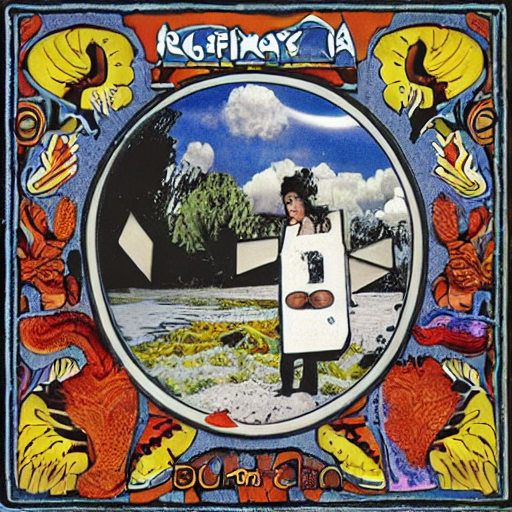

In [ ]:
grid = image_grid([image1], rows=1, cols=1)
grid



In [ ]:
all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
all_images = [image2, image3, image4, image5]
grid = image_grid(all_images, rows=1, cols=4)
grid


Output hidden; open in https://colab.research.google.com to view.

In [ ]:

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")


image1 = pipe(prompt="Album cover for a pop album from 2020").images[0]


image2 = pipe(prompt="Album cover for a indie album titled 'Liberation' ").images[0]


image3 = pipe(prompt="Album cover for a edm album titled 'Genesis'").images[0]


image4 = pipe(prompt="Album cover for a heavy metal album titled 'Hustle Manifesto'").images[0]

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]